In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
train_dir='/content/drive/MyDrive/dataset/train'
val_dir='/content/drive/MyDrive/dataset/test'

In [4]:
batch_size = 32
img_height = 250
img_width = 250
train_data=tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_data=tf.keras.preprocessing.image_dataset_from_directory(
  val_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 700 files belonging to 2 classes.
Found 317 files belonging to 2 classes.


In [5]:
class_names=train_data.class_names
print(class_names)

['Pikachu', 'Raichu']


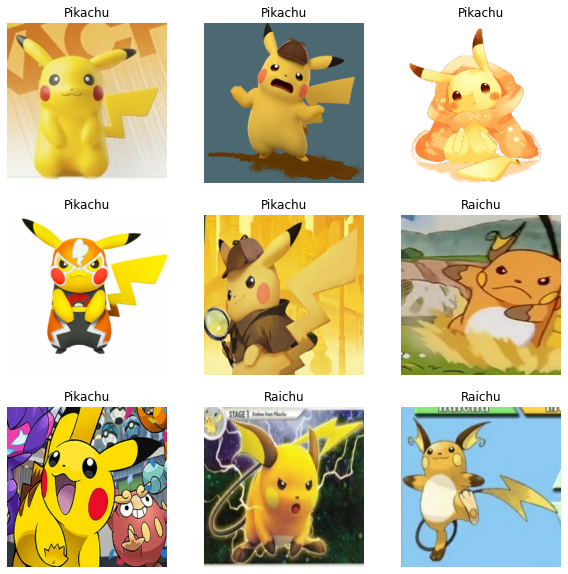

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
num_classes = 2

# defining model
model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),                         
    tf.keras.layers.Conv2D(32, (5,5), activation = 'relu'),
    tf.keras.layers.MaxPool2D(3,3),
    tf.keras.layers.Conv2D(64, (5,5) , activation = 'relu'),
    tf.keras.layers.MaxPool2D((3,3)),
    tf.keras.layers.Conv2D(128 , (5,5) , activation = 'relu'),
    tf.keras.layers.MaxPool2D((3,3)),
    tf.keras.layers.Conv2D(256 , (5,5) , activation = 'relu'),
    tf.keras.layers.MaxPool2D(3,3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5, seed = 5),
    tf.keras.layers.Dense(128 , activation = 'relu'),
    tf.keras.layers.Dense(num_classes , activation = 'sigmoid')])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 250, 250, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 246, 246, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 82, 82, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 78, 78, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0

In [ ]:
history = model.fit(train_data,validation_data=val_data,epochs=5)

Epoch 1/5
22/22 [==============================] - 17s 375ms/step - loss: 0.6922 - accuracy: 0.5586 - val_loss: 0.6099 - val_accuracy: 0.6972
Epoch 2/5
22/22 [==============================] - 9s 331ms/step - loss: 0.5706 - accuracy: 0.7244 - val_loss: 0.4684 - val_accuracy: 0.8107
Epoch 3/5
22/22 [==============================] - 9s 331ms/step - loss: 0.4833 - accuracy: 0.8121 - val_loss: 0.4975 - val_accuracy: 0.7697
Epoch 4/5
22/22 [==============================] - 9s 333ms/step - loss: 0.5018 - accuracy: 0.7793 - val_loss: 0.3523 - val_accuracy: 0.8707
Epoch 5/5
22/22 [==============================] - 9s 334ms/step - loss: 0.3999 - accuracy: 0.8235 - val_loss: 0.4220 - val_accuracy: 0.8139


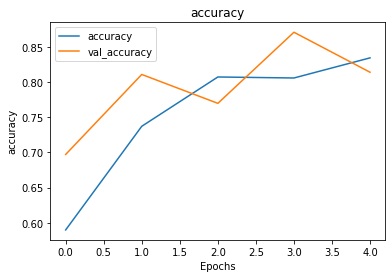

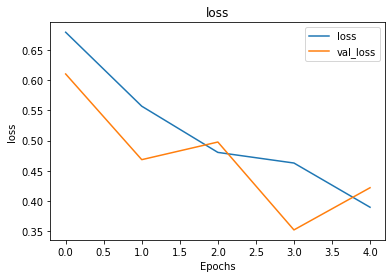

In [ ]:
# displaying graphs

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.title(string)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
test_dir = '/content/drive/MyDrive/dataset/check'
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    batch_size=256,
    class_mode='binary',
    target_size=(250,250))

Found 16 images belonging to 1 classes.
1/1 [==============================] - 0s 276ms/step - loss: 0.8478 - accuracy: 0.0000e+00


[0.8477978706359863, 0.0]

In [ ]:
model.evaluate(test_generator)

1/1 [==============================] - 0s 169ms/step - loss: 0.8478 - accuracy: 0.0000e+00


[0.8477978706359863, 0.0]

This image most likely belongs to Pikachu with a 62.95 percent confidence.




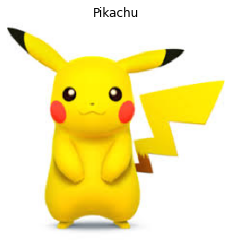

In [ ]:
test_dir = '/content/drive/MyDrive/dataset/check/data/008.jpeg'
img = tf.keras.preprocessing.image.load_img(test_dir, target_size=(img_height, img_width))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))
print('\n')

plt.title(class_names[np.argmax(score)])
plt.axis("off")
_=plt.imshow(img)

In [ ]:
model.save('/content/drive/MyDrive/dataset/check/data/model.pkl')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/dataset/check/data/model.pkl/assets


In [ ]:
model.save()

TypeError: ignored

In [ ]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(model, 'filename.pkl') 
  
# Load the model from the file 
knn_from_joblib = joblib.load('filename.pkl')

TypeError: ignored